# Earthquake Magnitude Analysis

In this analysis, we shall first plot the histograms of earthquake magnitudes for catalog from REAL and VELEST. Then we shall plot the cumulative distribution in log scale and try to fit with Gutenberg-Richter law. We need to find an optimum Magnitude of completeness and a b-value from this analysis.

In [1]:
#Import libraries
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [2]:
#Load magnitudes to list
mag_real=pd.read_csv('puna_catalog_velest_v5.txt',sep='\s+',header=None)[10]
#mag_velest=np.loadtxt('puna_mag_velest.txt')[:,10]
(np.min(mag_real),np.max(mag_real))

(0.11, 3.87)

## 1. Plotting histograms

Text(0, 0.5, 'Counts')

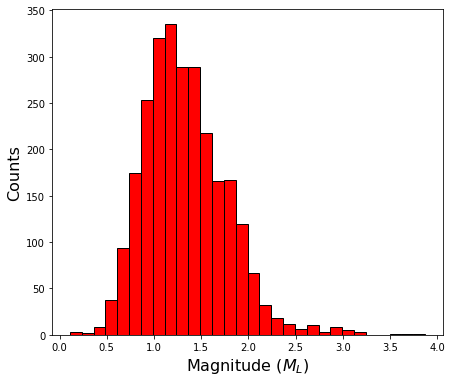

In [3]:
## Plot the histograms for different calalogs
fig = plt.figure(figsize=(7,6))
#fig.tight_layout(pad=1)

##
#ax = plt.subplot(121)
#plt.hist(mag_real, bins=30,alpha=1, histtype='bar', ec='black', color='red')
#plt.xlabel('Magnitude')
#plt.ylabel('Counts')
#plt.ylim([0,400])
#plt.title('Magnitude histogram for REAL catalog')

##
#ax = plt.subplot(122)
plt.hist(mag_real, bins=30,alpha=1, histtype='bar', ec='black', color='red')
plt.xlabel('Magnitude ($M_L$)',fontsize=16)
plt.ylabel('Counts',fontsize=16)
#plt.ylim([0,400])
#plt.title('Magnitude histogram for VELEST catalog')

#plt.gcf().set_dpi(300)
#plt.savefig('./plots/Histogram_magnitude_velest.png',dpi=300)


## 2. Fitting to Gutenberg-Richter law

In [4]:
MR=np.arange(0.1,3.9,.05)
count=[0]*len(MR)
for i in range(len(MR)):
    for j in range(len(mag_real)):
        if float(mag_real[j])>MR[i]:
            count[i]+=1
          

Text(0, 0.5, 'log(M)')

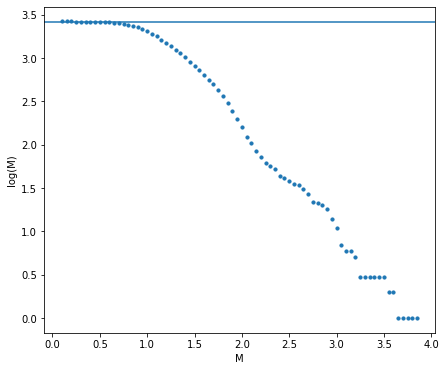

In [5]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()
#ax.set_yscale('log')
YV=np.log10(count)
plt.scatter(MR,YV,s=10)
plt.axhline(y=3.42)
plt.xlabel('M')
plt.ylabel('log(M)')

In [6]:
#Calculation of Mc and b-value
#Function to define RMS error
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.sum()

#define cutoff
E=[]
C=np.arange(0.1,2.5,0.1)
for c in C:

    MR1=[]
    MR2=[]
    YV1=[]
    YV2=[]

    #Split the list
    for i in range(len(MR)):
        if MR[i]<c:
            MR1.append(MR[i])
            YV1.append(YV[i])
        else:
            MR2.append(MR[i])
            YV2.append(YV[i])
        
    #Fit a line with 0 slope for first part
    #b1=np.mean(np.array(YV1)-0*np.array(MR1)) #best fitting intercept 
    
    b1=3.42 #we can also use a defined intercept
    fit1=[b1+0*m for m in MR1] #predicted values

    #Misfit value for first part
    err1=(mse(fit1,YV1))
    #print(err1)

    #second part

    z2 = np.polyfit(MR2, YV2, 1, full=True)
    fit2=[z2[0][1]+z2[0][0]*m for m in MR2] 

    #error
    err2=z2[1][0]
    #print(err2)
    E.append(err1+err2)
min_ind=(E.index(min(E)))
print("Best Mc value=",C[min_ind])

Best Mc value= 1.1


Text(0.5, 1.0, 'Misfit variation for different Mc values')

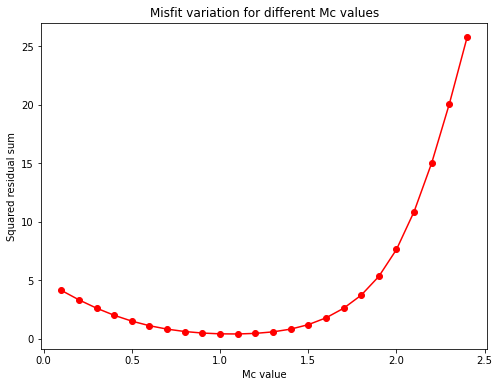

In [7]:
fig = plt.figure(figsize=(8,6))

plt.plot(C,E,"-o",color="red")
plt.xlabel("Mc value")
plt.ylabel("Squared residual sum")
plt.title("Misfit variation for different Mc values")
#plt.savefig("./plots/mc_minimum_real.png",dpi=300)

In [8]:
#Fitting for best Mc value and obtain b-value

MR1=[]
MR2=[]
YV1=[]
YV2=[]

#optimum Mc value
c=1.1

#Split the list
for i in range(len(MR)):
    if MR[i]<c:
        MR1.append(MR[i])
        YV1.append(YV[i])
    else:
        MR2.append(MR[i])
        YV2.append(YV[i])
        
#Fit a line with 0 slope for first part
b1=np.mean(np.array(YV1)-0*np.array(MR1)) #intercept
b1=3.42
fit1=[b1+0*m for m in MR1] #predicted values
print(b1)
#second part
z2 = np.polyfit(MR2, YV2, 1, full=True)
fit2=[z2[0][1]+z2[0][0]*m for m in MR2] 
slope=z2[0][0]
print("Obtained b-value=",-slope)

3.42
Obtained b-value= 1.2540627318534714


Text(0, 0.5, 'log(N)')

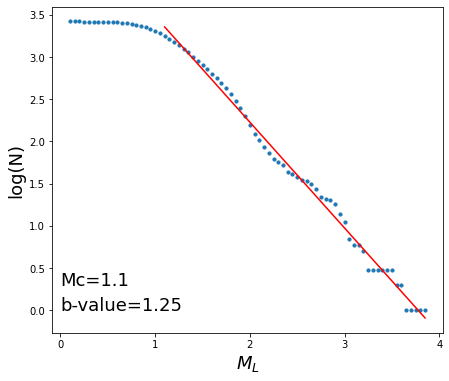

In [9]:
fig = plt.figure(figsize=(7,6))
ax = plt.gca()
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.scatter(MR,YV,s=10)
#plt.plot(MR1,fit1,color="red")
plt.plot(MR2,fit2,color="RED")

plt.text(0, 0.0, 'b-value=1.25', fontsize = 18)
plt.text(0, 0.3, 'Mc=1.1', fontsize = 18)

plt.xlabel('$M_L$',fontsize=18)
plt.ylabel('log(N)',fontsize=18)
#plt.savefig("./plots/b-value_fit_velest.png",dpi=300)